<a href="https://colab.research.google.com/github/chahatpatel2003/CSCI-167/blob/main/notebook_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Your loss = 12.673, correct loss = 12.367
Your gradients: (-31.500, -18.291)
Approx gradients: (-31.498, -18.290)


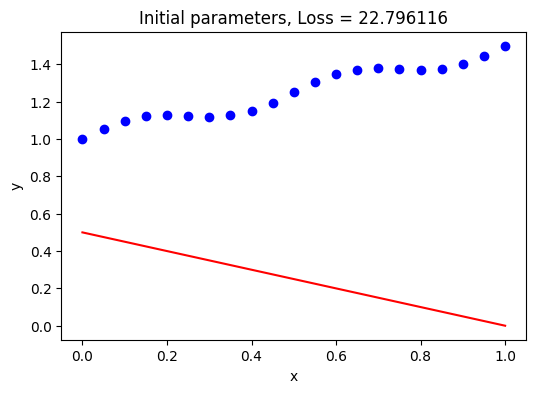

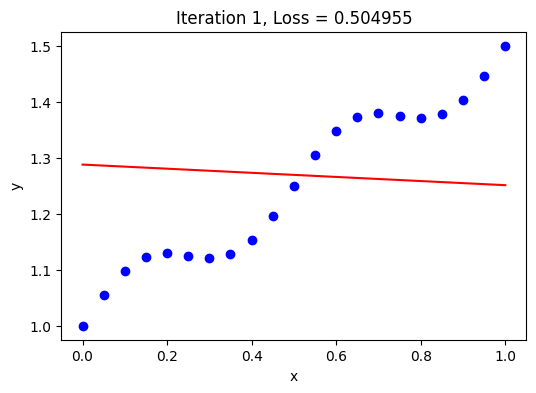

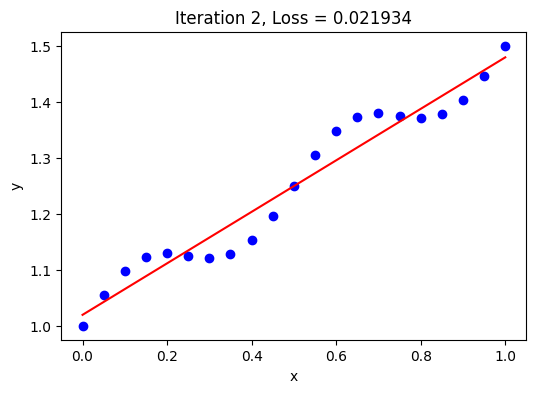

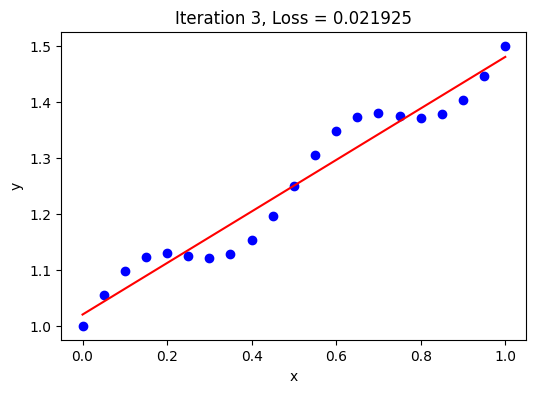

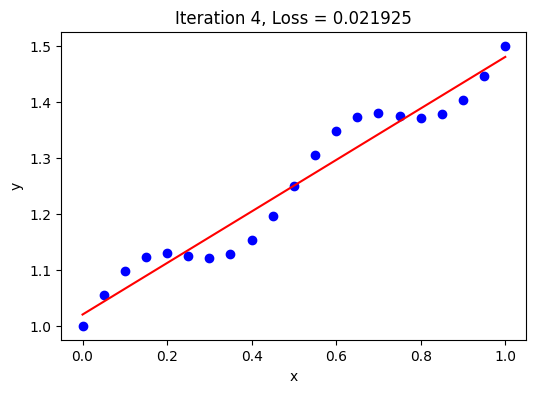

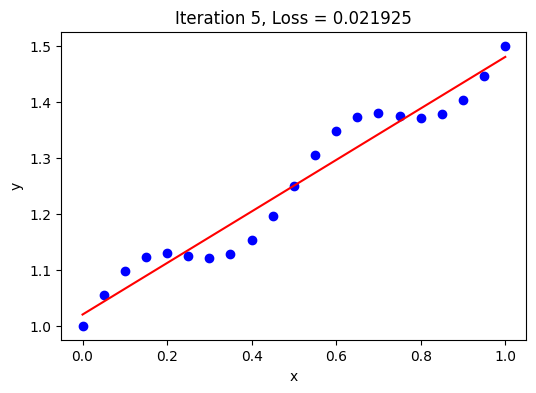

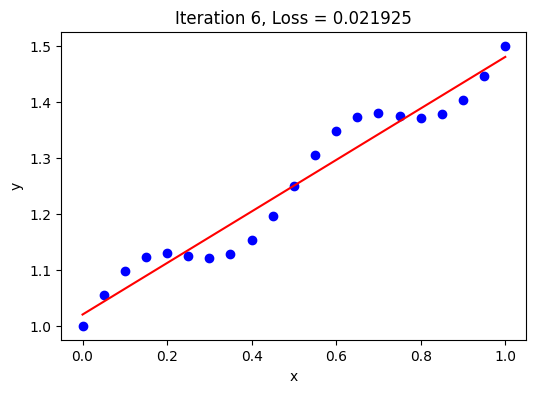

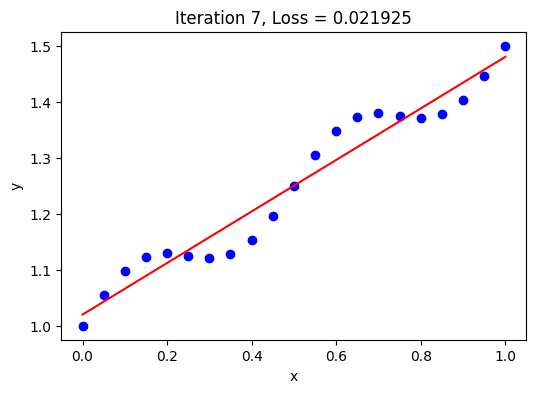

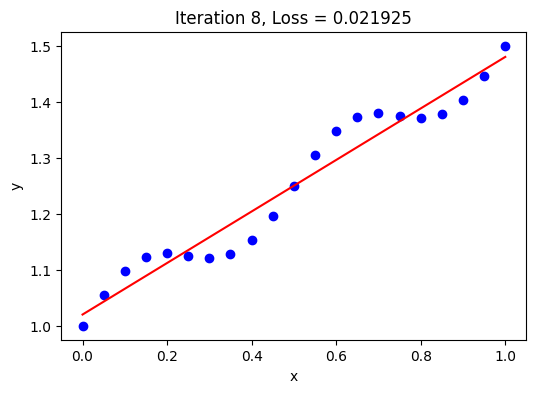

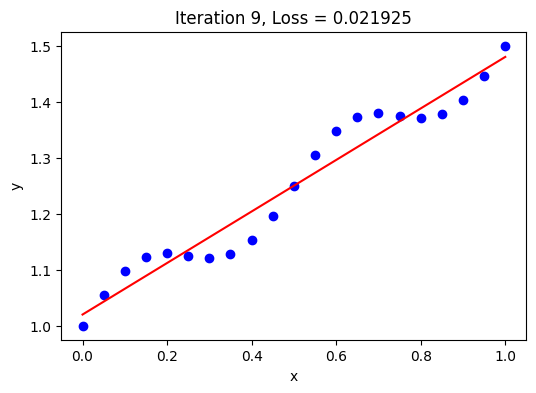

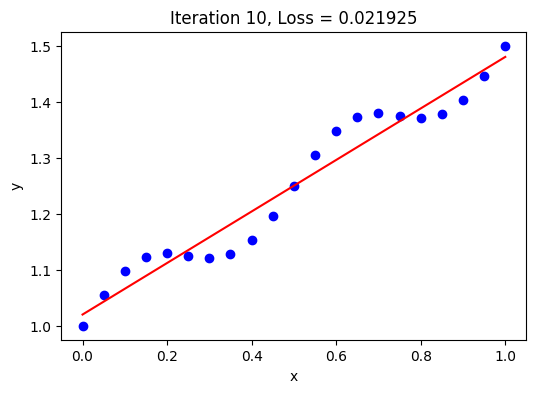

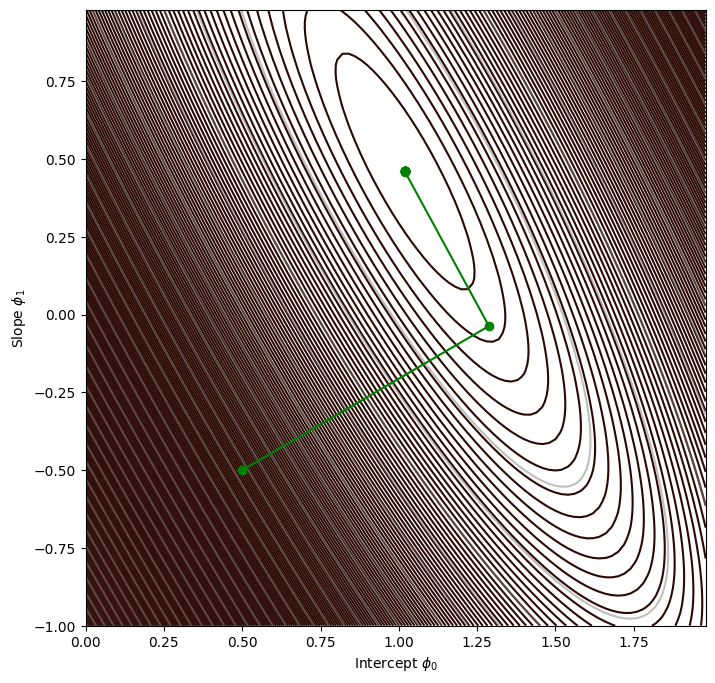

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data_x = np.linspace(0, 1, 21)
data_y = 1.0 + 0.5 * data_x + 0.05 * np.sin(4*np.pi*data_x)
data = np.vstack([data_x, data_y])

def model(x, phi):
    return phi[0] + phi[1] * x

def draw_model(data, model, phi, title):
    plt.figure(figsize=(6,4))
    plt.scatter(data[0,:], data[1,:], color='blue')
    x_line = np.linspace(0,1,100)
    y_line = model(x_line, phi)
    plt.plot(x_line, y_line, 'r-')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

def compute_loss(data_x, data_y, model, phi):
    pred_y = model(data_x, phi)
    diff = pred_y - data_y
    return np.sum(diff**2)

loss = compute_loss(data[0,:], data[1,:], model, np.array([0.6, -0.2]))
print('Your loss = %3.3f, correct loss = %3.3f' % (loss, 12.367))

def draw_loss_function(compute_loss, data, model, phi_iters=None):
    my_colormap_vals_hex = ['2a0902','2b0a03','2c0b04','2d0c05','2e0c06','2f0d07',
                            '300d08','310e09','320f0a','330f0b','34100b','35110c',
                            '36110d','37120e','38120f']
    my_colormap_vals_dec = np.array([int(e,16) for e in my_colormap_vals_hex])
    r = np.floor(my_colormap_vals_dec/(256*256))
    g = np.floor((my_colormap_vals_dec - r*256*256)/256)
    b = my_colormap_vals_dec - r*256*256 - g*256
    my_colormap = ListedColormap(np.vstack([r,g,b]).T/255.0)

    intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0,2.0,0.02),
                                               np.arange(-1.0,1.0,0.02))
    loss_mesh = np.zeros_like(slopes_mesh)
    for i in range(slopes_mesh.shape[0]):
        for j in range(slopes_mesh.shape[1]):
            loss_mesh[i,j] = compute_loss(data[0,:], data[1,:], model,
                                          np.array([intercepts_mesh[i,j], slopes_mesh[i,j]]))
    fig, ax = plt.subplots(1)
    fig.set_size_inches(8,8)
    ax.contour(intercepts_mesh, slopes_mesh, loss_mesh, 256, cmap=my_colormap)
    ax.contour(intercepts_mesh, slopes_mesh, loss_mesh, 40, colors='#80808080')
    if phi_iters is not None:
        ax.plot(phi_iters[0,:], phi_iters[1,:], 'go-')
    ax.set_xlabel('Intercept $\\phi_{0}$')
    ax.set_ylabel('Slope $\\phi_{1}$')
    plt.show()

def compute_gradient(data_x, data_y, model, phi):
    pred_y = model(data_x, phi)
    diff = pred_y - data_y
    dL_dphi0 = 2 * np.sum(diff)
    dL_dphi1 = 2 * np.sum(diff * data_x)
    return np.array([dL_dphi0, dL_dphi1])

phi = np.array([0.6, -0.2])
grad = compute_gradient(data[0,:], data[1,:], model, phi)
delta = 0.0001
dL_dphi0_est = (compute_loss(data[0,:], data[1,:], model, phi + np.array([delta,0])) -
                compute_loss(data[0,:], data[1,:], model, phi)) / delta
dL_dphi1_est = (compute_loss(data[0,:], data[1,:], model, phi + np.array([0,delta])) -
                compute_loss(data[0,:], data[1,:], model, phi)) / delta
print("Your gradients: (%3.3f, %3.3f)" % (grad[0], grad[1]))
print("Approx gradients: (%3.3f, %3.3f)" % (dL_dphi0_est, dL_dphi1_est))

def loss_function_1D(dist_prop, data, model, phi_start, search_direction):
    return compute_loss(data[0,:], data[1,:], model,
                        phi_start + search_direction * dist_prop)

def line_search(loss_function, draw_flag=False):
    a, b, c, d = 0.0, 1.0, 4.0, 5.0
    max_iter = 20
    for _ in range(max_iter):
        la, lb, lc, ld = loss_function(a), loss_function(b), loss_function(c), loss_function(d)
        if la < lb and la < lc and la < ld:
            b = (a+b)/2.0
            c = (a+c)/2.0
            d = (a+d)/2.0
            continue
        if lb < lc:
            d = c
            b = a + (d-a)/3.0
            c = a + 2*(d-a)/3.0
            continue
        if lc < lb:
            a = b
            b = a + (d-a)/3.0
            c = a + 2*(d-a)/3.0
            continue
    return (b + c) / 2.0

def gradient_descent_step(phi, data, model):
    grad = compute_gradient(data[0,:], data[1,:], model, phi)
    direction = -grad
    alpha = line_search(lambda dist: loss_function_1D(dist, data, model, phi, direction))
    return phi + alpha * direction

n_steps = 10
phi_all = np.zeros((2, n_steps+1))
phi_all[:,0] = [0.5, -0.5]

loss = compute_loss(data[0,:], data[1,:], model, phi_all[:,0])
draw_model(data, model, phi_all[:,0], "Initial parameters, Loss = %f" % loss)

for i in range(n_steps):
    phi_all[:, i+1] = gradient_descent_step(phi_all[:, i], data, model)
    loss = compute_loss(data[0,:], data[1,:], model, phi_all[:, i+1])
    draw_model(data, model, phi_all[:, i+1], "Iteration %d, Loss = %f" % (i+1, loss))

draw_loss_function(compute_loss, data, model, phi_all)
